In [1]:
#优点
#可解释性强
#缺点
#受数据集的异常点影响较大

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

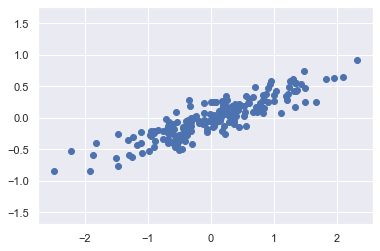

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [21]:
import sklearn.decomposition
pca = sklearn.decomposition.PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [4]:
#主成分系数
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [5]:
#主成分可解释差异
print(pca.explained_variance_)

[0.7625315 0.0184779]


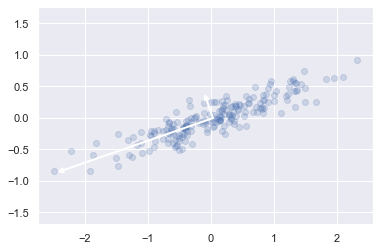

In [8]:
#用“成分”定义向量的方向，将“可解释差异”作为向量的平方长度
#这种从数据的坐标轴变换到主轴的变换是一个仿射变换，仿射变换包含平移（translation）、旋转（rotation）和均匀缩放（uniform scaling）三个步骤。
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [9]:
#PCA降维
pca = sklearn.decomposition.PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


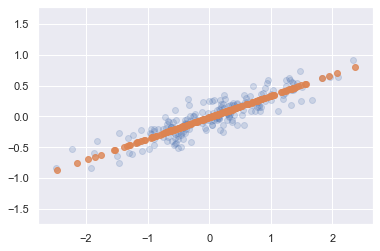

In [10]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [11]:
#用PCA作数据可视化：手写数字
#准备数据
import sklearn.datasets
digits = sklearn.datasets.load_digits()
digits.data.shape

(1797, 64)

In [12]:
pca = sklearn.decomposition.PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


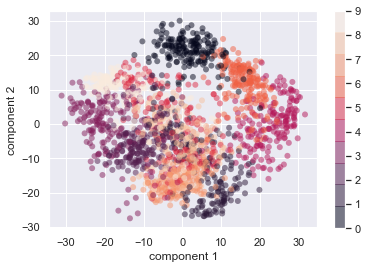

In [19]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap(None, 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

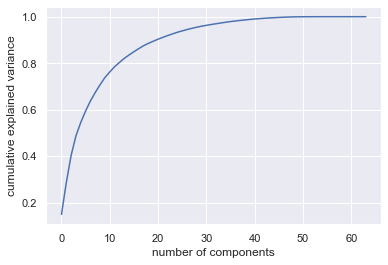

In [22]:
#查看累计方差贡献率
pca = sklearn.decomposition.PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

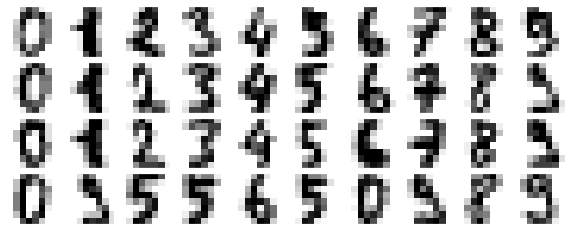

In [23]:
#PCA噪音过滤
#任何成分的方差都远大于噪音的方差，所以相比于噪音，成分应该相对不受影响。因此，如果你仅用主成份的最大子集重构该数据，那么应该可以实现选择性保留信号并且丢弃噪音。
#准备数据
#原数据
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

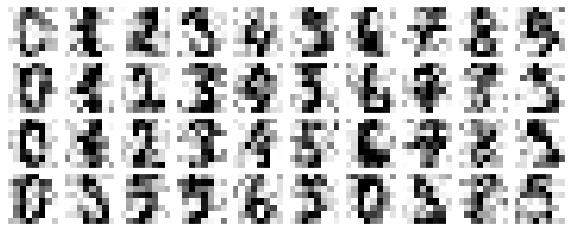

In [24]:
#加上高斯噪音之后的数据
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [28]:
#用噪音数据训练一个PCA，要求投影后保存50% 的方差
pca = sklearn.decomposition.PCA(0.50).fit(noisy)
pca.n_components_

12

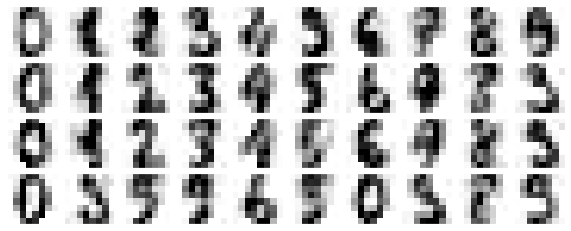

In [29]:
#过滤噪音之后
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)